In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import math
import itertools
from mpl_toolkits.mplot3d import Axes3D
from mlrefined_libraries import math_optimization_library as optlib
from sklearn.linear_model import LinearRegression
static_plotter = optlib.static_plotter.Visualizer();



${4.1}$
![avator](/Users/xiangyanxin/personal/GraduateCourse/ML/assignment/pic/4-1-1.png)
![avator](/Users/xiangyanxin/personal/GraduateCourse/ML/assignment/pic/4-1-2.png)

${5.2}$

In [2]:
def mode(x,w):
    y_hat = np .dot(x, w)
    return y_hat
def least_squares (y,x,w):
    cost = np. sum (( mode(x, w) - y) ** 2)
    return cost / (2*float(y. size))
def linear_gradient_descent(x,y,w,alpha=0.1,max_its=100):   
    gradient = lambda w : (1 / float(y.size)) * (x.T.dot(x.dot(w) - y))
    weight_history = [w]          
    cost_history = [least_squares(y,x,w)]          
    for _ in range(max_its):
        grad_eval = gradient(w)
        w = w - alpha*grad_eval
        weight_history.append(w)
        cost_history.append(least_squares(y,x,w))
    return weight_history,cost_history

data_path="data/"
file_name="kleibers_law_data.csv"
csv_name=data_path+file_name
data=np.loadtxt(csv_name,delimiter=',')
x=data[:-1,:]
y=data[-1:,:]
#print(np.log(1370))
x=[np.log(xi) for xi in x]
y=[np.log(yi) for yi in y]
x = np.reshape(x,(-1,1))
y=np.reshape(y,(-1,1))
model=LinearRegression()
model.fit(x,y)
w0=model.intercept_
w1=model.coef_
y=lambda x:np.log(w0+w1*x)
print(w0)
print(w1)
print(y(10))

[6.81473477]
[[0.6528121]]
[[2.59098109]]


c. ${y=x^{0.6528121}+e^{6.81473477}}$  
d. 2.59098109

711.0
(506, 13)
(506, 1)
nan
(398, 7)
(398, 1)


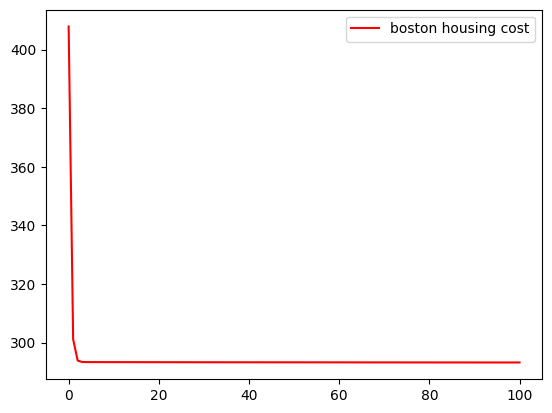

In [3]:
#5.9
def normalization(data):
    range = np.max(data) - np.min(data)
    return (data - np.min(data)) / range
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma
file_name="boston_housing.csv"
csv_name=data_path+file_name
data=np.loadtxt(csv_name,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]
print(np.max(x))
x=np.reshape(x,(506,13))
x=standardization(x)
y=np.reshape(y,(506,1))
print(np.shape(x))
print(np.shape(y))
w=np.ones((13,1))
_,cost_mse_bos=linear_gradient_descent(x,y,w)
file_name="auto_data.csv"
csv_name=data_path+file_name
data=np.loadtxt(csv_name,delimiter=',')
xx = data[:-1,:]
yy = data[-1:,:]
xx=np.reshape(xx,(398,7))
print(np.max(xx))
xx=normalization(xx)
yy=np.reshape(yy,(398,1))
print(np.shape(xx))
print(np.shape(yy))
w=np.ones((7,1))
_,cost_mse_mobile=linear_gradient_descent(xx,yy,w)
w=np.linspace(0,100,101)

plt.plot(w,cost_mse_bos,color='r',label="boston housing cost")
plt.legend()
plt.show()

In [4]:
#6.5
def mod(x,w):
    a=w[0]+np.dot(x.T,w[1:])
def sigmoid(t):
    return 1/(1+np.exp(-t))
def cross_entropy(w):
    a=sigmoid(mod(x,w))
    ind=np.argwhere(y==0)[:,1]
    cost=-np.sum(np.log(1-a[:,ind]))
    ind=np.argwhere(y==1)[:,1]
    cost-=np.sum(np.log(a[:,ind]))
    return cost/y.size


${6-5}$
![avator](/Users/xiangyanxin/personal/GraduateCourse/ML/assignment/pic/6-5.png)

${6-11}$
![avator](/Users/xiangyanxin/personal/GraduateCourse/ML/assignment/pic/6-11.png)